In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
df = pd.read_csv("D:\Timeseries\exchange_rate.csv")

In [90]:
df =pd.DataFrame(df)
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [91]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [93]:
df['date'] = pd.to_datetime(df['date'])

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     7588 non-null   datetime64[ns]
 1   Ex_rate  7588 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 118.7 KB


In [95]:
df

,date,Ex_rate
0,1990-01-01,0.785500
1,1990-02-01,0.781800
2,1990-03-01,0.786700
3,1990-04-01,0.786000
4,1990-05-01,0.784900
...,...,...
7583,2010-06-10,0.718494
7584,2010-07-10,0.721839
7585,2010-08-10,0.723197
7586,2010-09-10,0.720825


In [96]:
df.set_index('date', inplace = True)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-10-10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6 KB


In [98]:
df_monthly = df.resample('M').mean()

In [99]:
df_monthly

,Ex_rate
date,
1990-01-31,0.769661
1990-02-28,0.765589
1990-03-31,0.768568
1990-04-30,0.777073
1990-05-31,0.784868
...,...
2010-08-31,0.752128
2010-09-30,0.742300
2010-10-31,0.749748


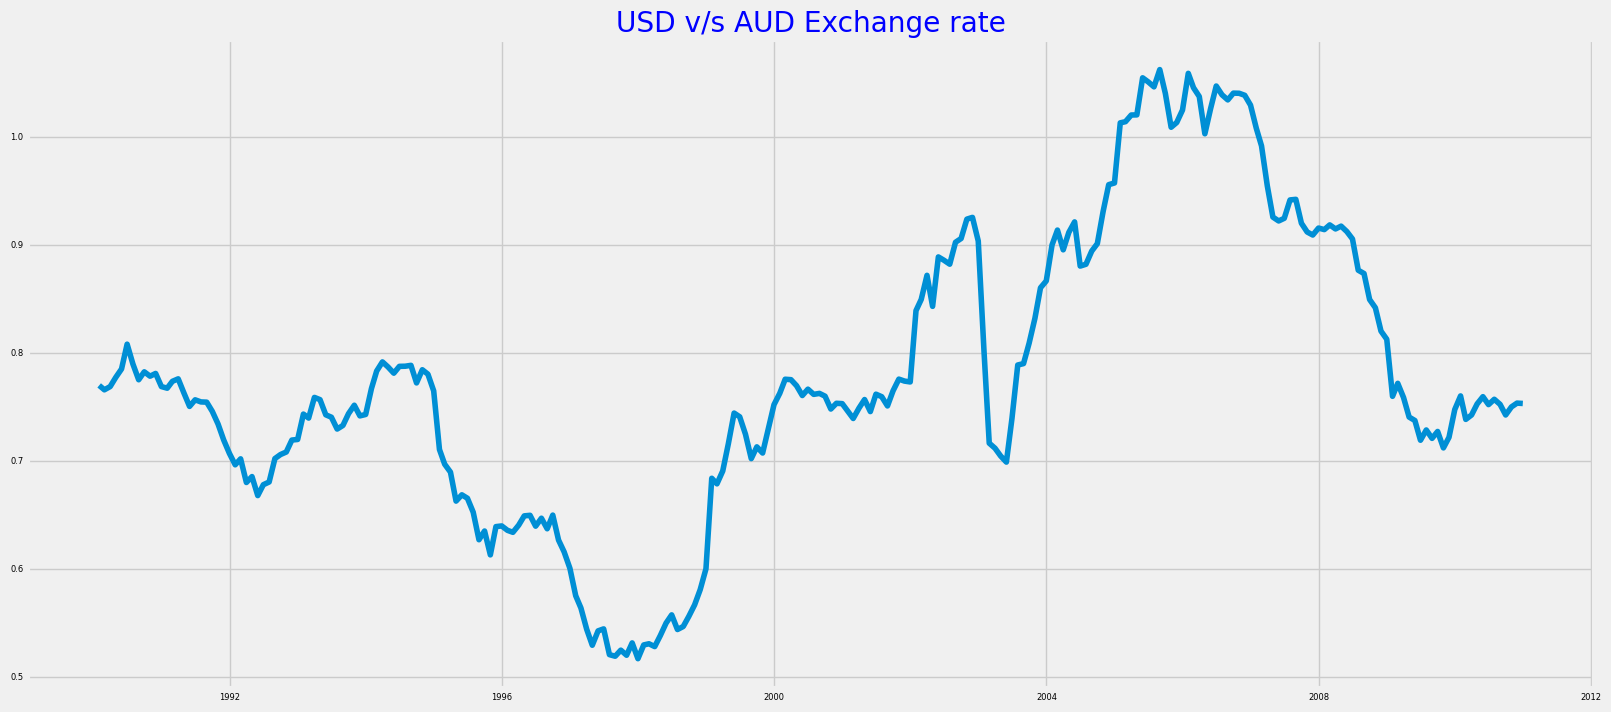

In [100]:

plt.plot(df_monthly)
plt.title("USD v/s AUD Exchange rate")
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_1704\3099512138.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_monthly)


<Axes: ylabel='Density'>

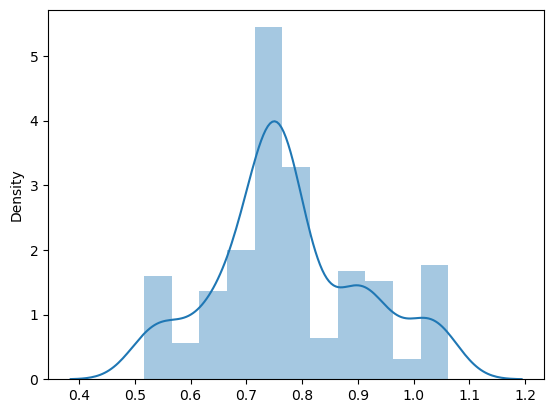

In [14]:
sns.distplot(df_monthly)

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
def test_stationarity(testseries):
    rolmean = testseries.rolling(12).mean()
    rolstd = testseries.rolling(12).std()
    
    original = plt.plot(testseries, label = "origin")
    mean = plt.plot(rolmean, label = 'Rollingmean')
    std = plt.plot(rolstd, label = "Rollingstd")
    plt.legend(loc = 'best')
    plt.show()
    
    dftest = adfuller(testseries)

    print('adf:',dftest[0])
    print('Pvalue:',dftest[1])
    print('usedlag:',dftest[2])
    print('nobs:',dftest[3])
    
    

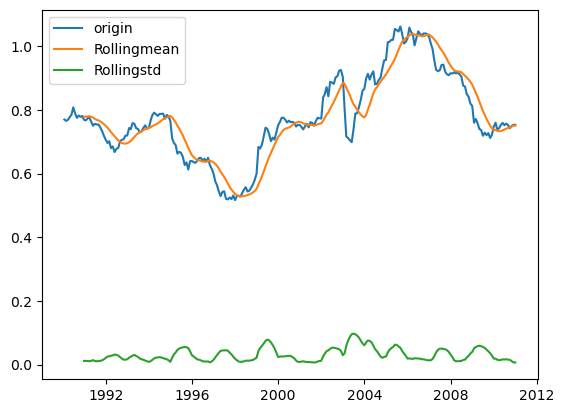

adf: -1.6376969673292145
Pvalue: 0.4634644461234495
usedlag: 2
nobs: 249
None


In [17]:
print(test_stationarity(df_monthly))

In [18]:
# Using log function to reduce the P value 
df_log = np.log(df_monthly)


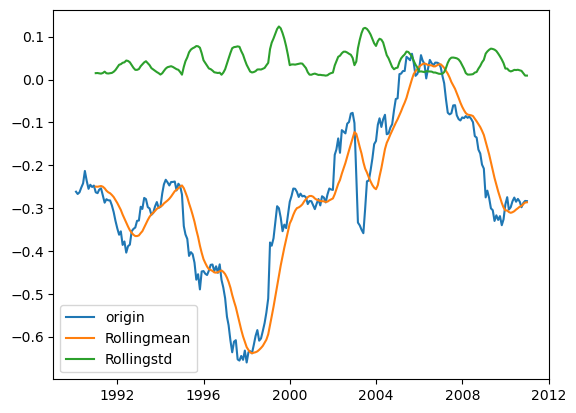

adf: -1.6530749313968707
Pvalue: 0.4554372541410345
usedlag: 2
nobs: 249


In [19]:
test_stationarity(df_log)

In [20]:
# Using moving average to reduce the P value 
ma = df_log.rolling(12).mean()
df_log_ma = df_log-ma - ma
df_log_ma.dropna(inplace=True)

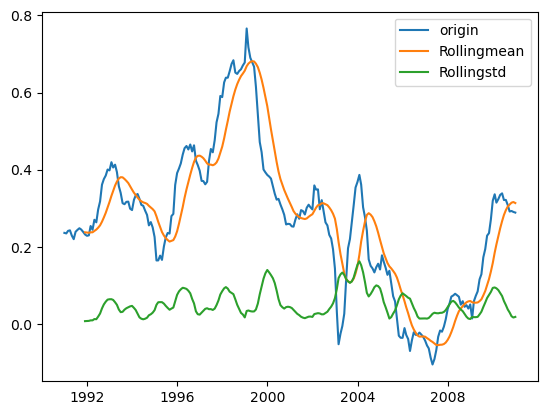

adf: -2.1336713167281705
Pvalue: 0.23119245198704924
usedlag: 5
nobs: 235


In [21]:
test_stationarity(df_log_ma)

In [22]:
# using diff with period shift to reduce the p value 
df_log_ps = df_log.diff(periods = 6)
df_log_ps.dropna(inplace=True)

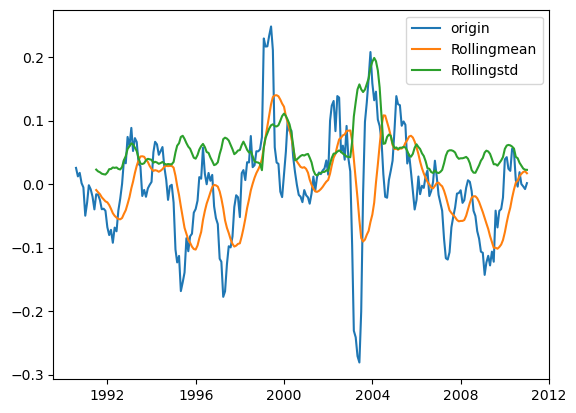

adf: -3.1511281652280294
Pvalue: 0.022993657775630574
usedlag: 14
nobs: 231


In [23]:
test_stationarity(df_log_ps)

P value is below 5% hence we will reject the null hypothsis and accept the alternative series as data is stationarity 

I will use df_log_ps for thefurther analysis

In [24]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

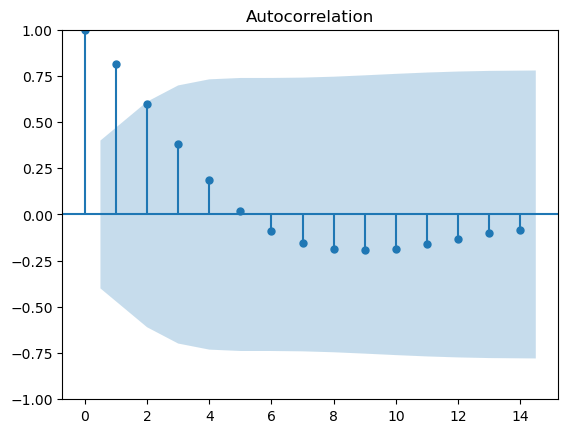

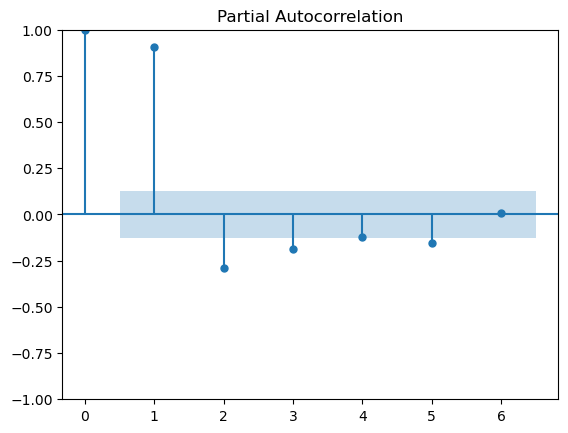

In [25]:
lag_acf = acf(df_log_ps)
lag_pacf = pacf(df_log_ps)

plot_acf(lag_acf)

nlags = 6 
plot_pacf(df_log_ps, lags=nlags)
plt.show()

P = 1,
D = 1,
Q = 0

In [46]:
import warnings
import itertools
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')
plt.rcParams['axes.labelsize'] = 6
plt.rcParams['xtick.labelsize'] = 6
plt.rcParams['ytick.labelsize'] = 6
plt.rcParams['text.color'] = 'b'

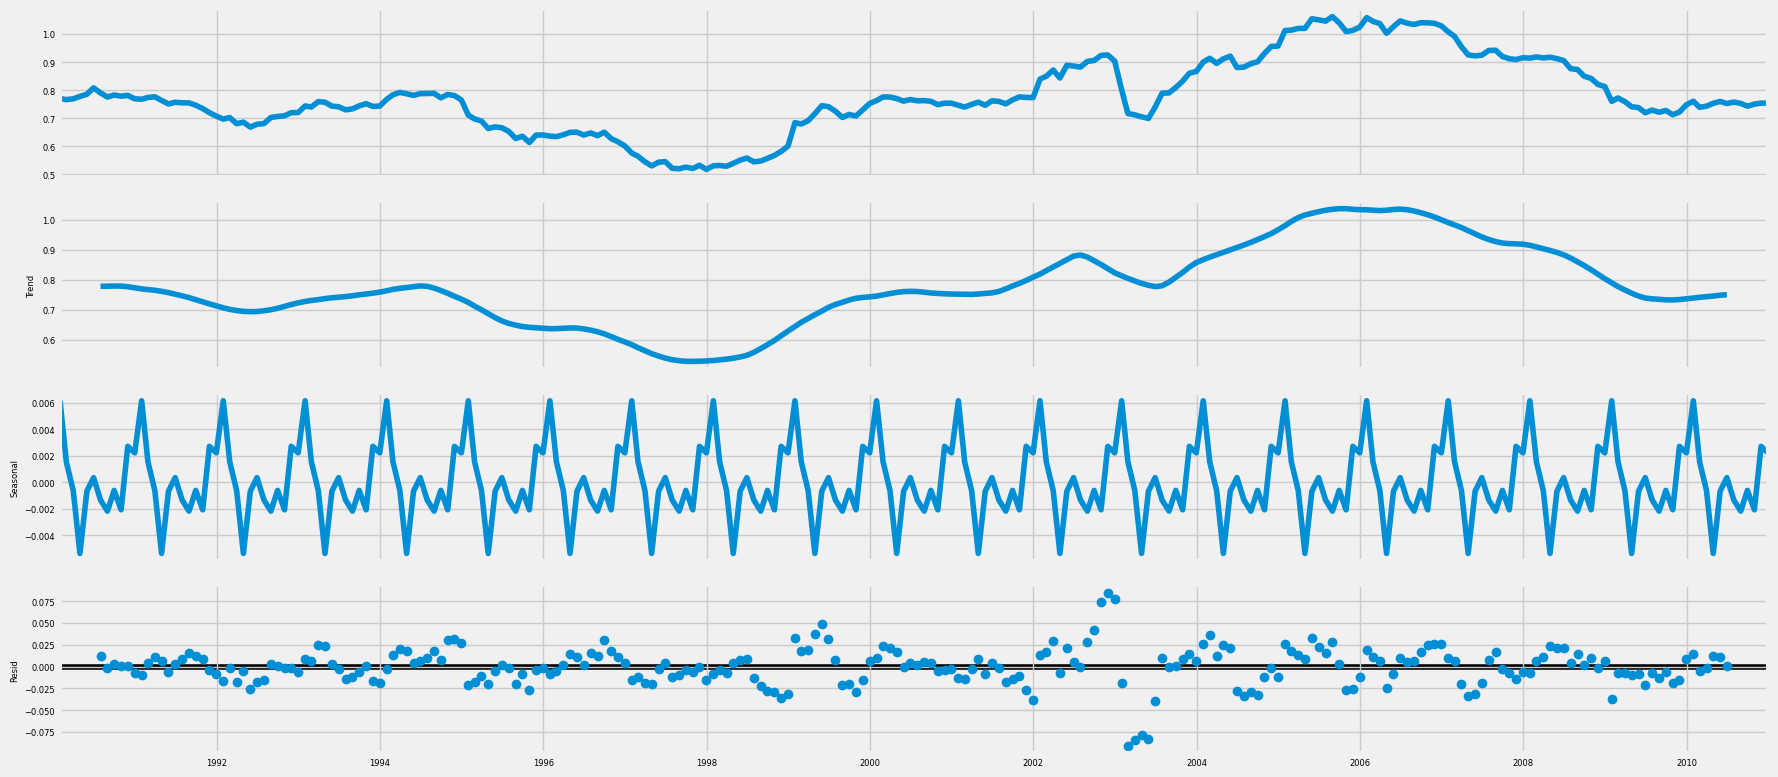

In [62]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_monthly, model='additive')
fig = decomposition.plot()
plt.show()

In [101]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_monthly,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
                continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:594.674086942012
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:300.8519284378002
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-454.16941539028437
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-420.04366419025814
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-456.3795458586235
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-451.57781242346493
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-422.35381570616323
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-418.1616305003365
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:261.36478648646846
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:-12.116437342635813
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-706.4796111395619
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-661.1766360772272
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-713.0134245590161
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-703.6566271152503
ARIMA(0, 0, 1)x(1

In [107]:
#as per lowest AIC value P,D,Q is ( 0, 0, 1)x(0, 0, 1, 12)
mod = sm.tsa.statespace.SARIMAX(df_monthly,
                                order=(0, 0, 1),
                                seasonal_order=(0, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

ValueError: SARIMAX models require univariate `endog`. Got shape (252, 2).

In [26]:
from statsmodels.tsa.arima.model import ARIMA

In [72]:
import statsmodels.api as sm

In [108]:
model=sm.tsa.statespace.SARIMAX(df_monthly[['Ex_rate']],order=(0, 0, 1),seasonal_order=(0,0,1,12))
results=model.fit()

In [109]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Ex_rate   No. Observations:                  252
Model:             SARIMAX(0, 0, 1)x(0, 0, 1, 12)   Log Likelihood                   8.527
Date:                            Sun, 23 Jun 2024   AIC                            -11.055
Time:                                    09:36:15   BIC                             -0.466
Sample:                                01-31-1990   HQIC                            -6.794
                                     - 12-31-2010                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.9783      0.015     64.997      0.000       0.949       1.008
ma.S.L12       0.9427      0.116      8.102      0.000       0.715       1.171
sigma2         0.0491      0.010      5.103      0.000       0.030       0.068
===================================================================================
Ljung-Box (L1) (Q):                  62.96   Jarque-Bera (JB):                12.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.64   Skew:                             0.54
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='date'>

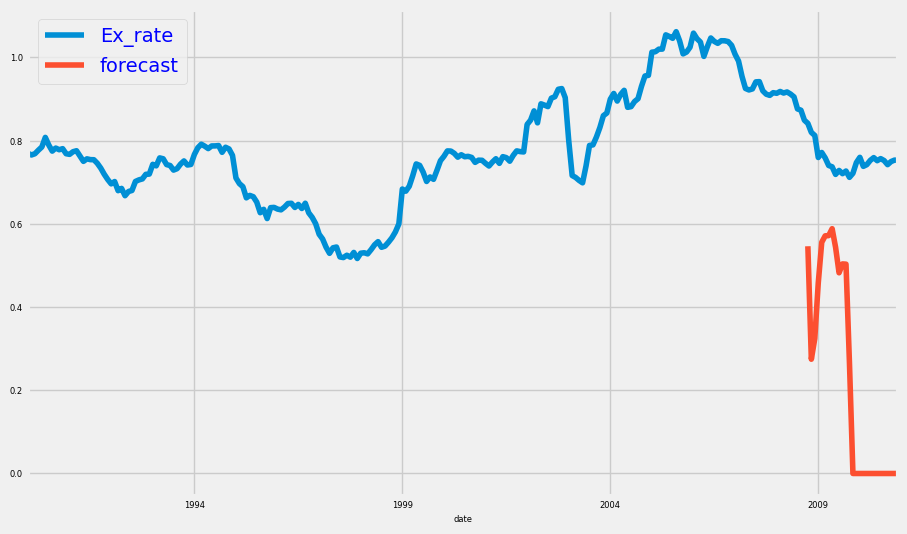

In [111]:
df_monthly['forecast']=results.predict(start=225,end=252,dynamic=True)
df_monthly[['Ex_rate','forecast']].plot(figsize=(10,6))

In [116]:

mse = (df_monthly[['Ex_rate','forecast']] ** 2).mean()
print('The Mean Squared Error of our forecasts is',round(mse, 2))

The Mean Squared Error of our forecasts is Ex_rate     0.62
forecast    0.11
dtype: float64


In [117]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is Ex_rate     0.79
forecast    0.34
dtype: float64


In [120]:
mape = np.mean(np.abs((df_monthly['Ex_rate'] - df_monthly['forecast']) / df_monthly['Ex_rate'])) * 100
print(mape)

69.58375601060011
